In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Derivative

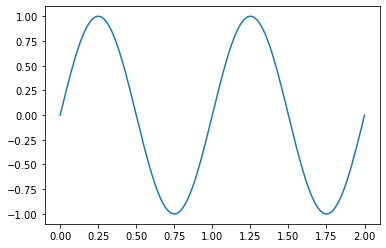

In [4]:
N = 500
x = np.linspace( 0 , 2 , N)
#linspace works for returning evenly spaced numbers over a specified interval.
dx = x[1] - x[0]
# since derivative is determined in the interval we have to show the intervalf or programming, hence we define interval as dx here
y = np.sin(2*np.pi*x)

plt.plot(x,y);
# below you can see the defined sin garph, in the following code we will take the derivative of this graph.

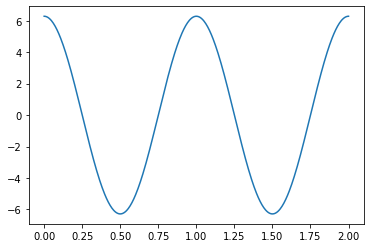

In [5]:
y_derivative = np.gradient(y, dx);
plt.plot(x, y_derivative);

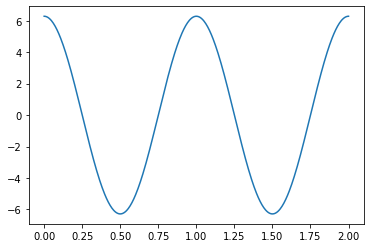

In [6]:
plt.plot(x , 2*np.pi*np.cos(2*np.pi*x))

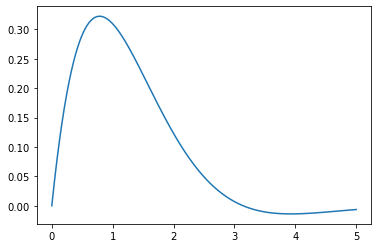

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
N = 1000
x = np.linspace( 0 , 5 , N)
#linspace works for returning evenly spaced numbers over a specified interval.
dx = x[1] - x[0]

y= np.exp(-x) * np.sin(x)

plt.plot(x,y);


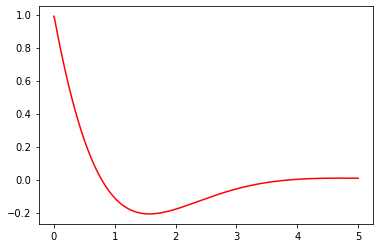

In [12]:
y_derivative = np.gradient(y, dx);
plt.plot(x, y_derivative , 'r');

Integral

we have to use Scipy lib function for integral.

$$ \int_a^b f(x) dx $$

In [3]:
from scipy import integrate
import numpy as np
def func(x): 
    return np.exp(-x)

int_y = integrate.quad(func, 0 , 100)
print(int_y)

#below solution the first part is the solution of the integral, the second part is the error value

(1.0000000000000002, 5.989345779087516e-12)


In [10]:
N = 5
x = np.linspace(0, 10 , N)
#REMARK: Return evenly spaced numbers over a specified interval.
dx = x[1] - x[0]
int_y = np.sum(func(x)) * dx 
print(int_y)

2.723553574807236


In [3]:
import numpy as np
from scipy import integrate
import numpy as np
def func(x): 
    return np.exp(-x)
N = 1000
x = np.linspace(0, 10 , N)
dx = x[1] - x[0]
int_y = np.sum(func(x)) * dx 
print(int_y)

1.004968181934117


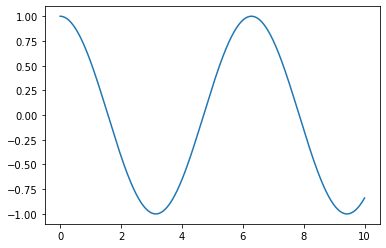

In [5]:
import matplotlib.pyplot as plt
N = 500
x = np.linspace( 0, 10 ,N)
int_y = np.zeros(N)
plt.plot(x, np.cos(x));

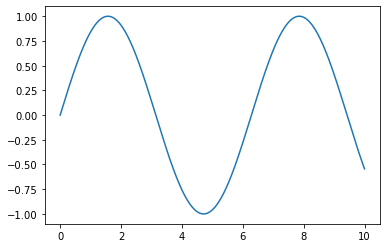

In [6]:
# our aim is now finding the area under blue line
for ind, x_val in enumerate(x):
    #enumerate(iterable, start=0) , Return an enumerate object. iterable an object supporting iteration
    int_y[ind] = integrate.quad(lambda x: np.cos(x),  0 , x_val)[0]
    #integrate.quad >>>>> Compute a definite integral.Integrate func from `a` to `b` (possibly infinite interval) using a technique from the Fortran library QUADPACK.
    #what we have done with this code is for any value of x, calculate integrate of cos(x). Therefore the following plot should be theplot of sin(x)
plt.plot(x , int_y)

    

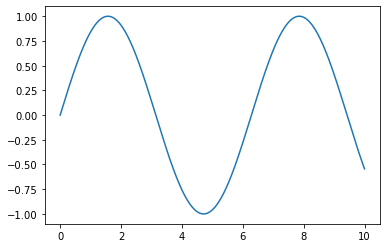

In [7]:
#for checking below I will draw the sin(x) plot
plt.plot(x, np.sin(x))

Scipy : open-source software for mathematics, science, and engineering 

Special Functions : Nearly all of the functions below are universal functions and follow broadcasting and automatic array-looping rules.

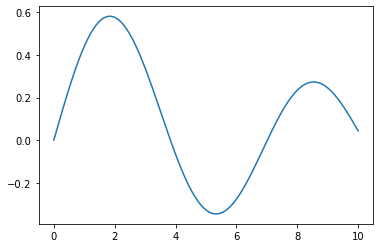

In [10]:
import scipy 
N = 500
z = np.linspace( 0 , 10 ,N)
#Bessel function of the first kind of real order and complex argument.
plt.plot(z,  scipy.special.jv(1 , z))

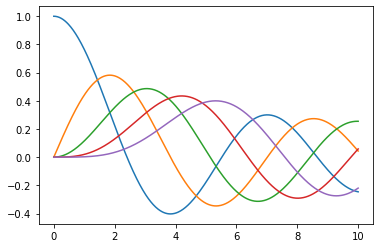

In [12]:
# for different order of Bessel function
import scipy 
N = 500
z = np.linspace( 0 , 10 ,N)
for v in range(5):
    plt.plot(z,  scipy.special.jv(v , z));

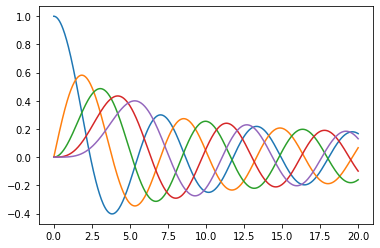

In [13]:
import scipy 
N = 500
z = np.linspace( 0 , 20  ,N)
for v in range(5):
    plt.plot(z,  scipy.special.jv(v , z));

Statistics for Scipy

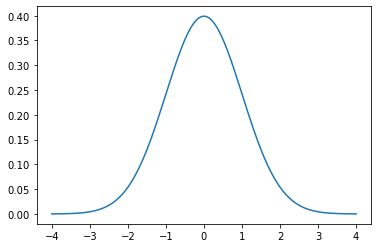

In [14]:
import scipy.stats
x = np.linspace(-4 , 4 , 200)
plt.plot(x, scipy.stats.norm.pdf(x));
#norm stands for a normal continuous random variable.


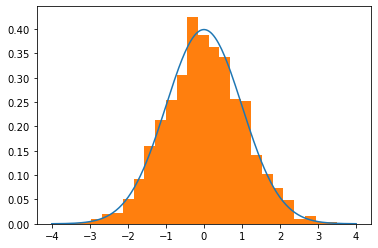

In [22]:
import scipy.stats
x = np.linspace(-4 , 4 , 200)
#hist stands for "Plot a histogram.""
plt.plot(x, scipy.stats.norm.pdf(x));
plt.hist(scipy.stats.norm.rvs(size= 2000), density = True , bins = 25);
# density stands for optimization of area = 1
#size stands for the rectangular size under the area

Linear Algebra

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

M = np.array([[-1 , 2] , [5 , 4]])
print(M)
scipy.linalg.det(M)
#scipy.linalg.det() stands for finding the determinant of the matrix M



[[-1  2]
 [ 5  4]]


-14.0

In [3]:
M = np.array([[-1 , 2] , [5 , 4]])
print(M)
scipy.linalg.eig(M)
#for finding eigenvalue it can be an ordinary or generalized eigenvalue problem of a square matrix.

[[-1  2]
 [ 5  4]]


(array([-2.53112887+0.j,  5.53112887+0.j]),
 array([[-0.79402877, -0.2928046 ],
        [ 0.60788018, -0.9561723 ]]))

Curve Fitting / Optimization

This python library consists of functions for minimizing (or maximizing) objective functions,

In [4]:
from scipy.optimize import curve_fit
# we import the scipy library for curve fitting here

In [10]:
def profile(f, f0 , gamma ,offset):
    return 1 / (1 + ((f - f0) / gamma) ** 2 )  + offset;
#Lorentzian fucntion
#f0 is the center, height from zero level is offset, width is gamma

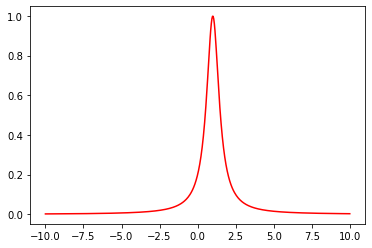

In [11]:
N = 500
f = np.linspace(-10 , 10 , N)
y = profile(f, 1 , 0.5 , 0)
plt.plot(f, y, 'r');

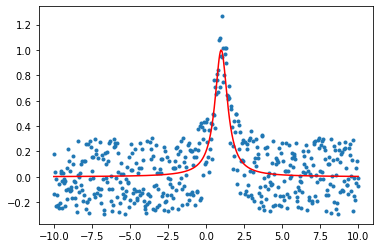

In [27]:
# above graph is too much idealistic for an experiment therefore we are adding noise to the data from the random funtion of python numpy library.
y_data = y + np.random.uniform(-0.3 , 0.3 , N)
plt.plot(f, y_data , '.');
plt.plot(f, y ,'r');


In [28]:
popt, pcov = curve_fit(profile, f,  y_data , p0=[0.5 , 1 , -0.1])
print(popt)
#curve fit stands for using non-linear least squares to fit a function, f, to data.
#p0 is the initial guess
#popt stands for optimal values for the parameters
#pcov stands for the diagonals provide the variance of the parameter estimate

[ 1.05292426  0.56331838 -0.00933121]


[ 1.05292426  0.56331838 -0.00933121]


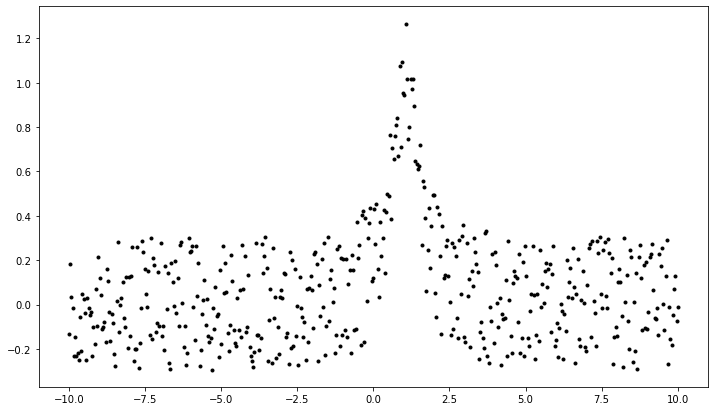

In [29]:
popt, pcov = curve_fit(profile, f,  y_data , p0=[0.5 , 1 , -0.1])
print(popt)
plt.figure(figsize = (12, 7))
plt.plot(f,  y_data , 'k.');

[ 1.05292426  0.56331838 -0.00933121]


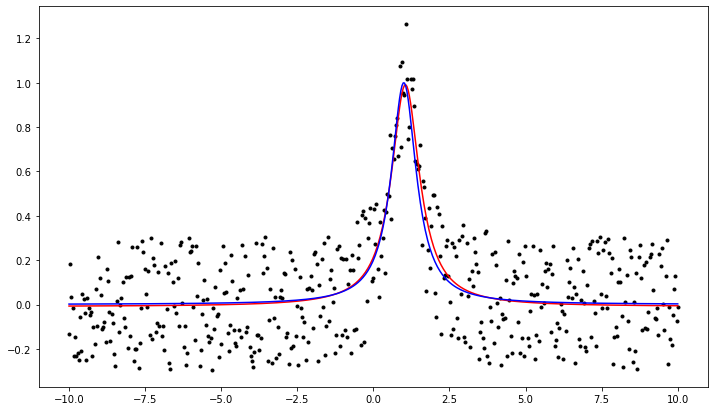

In [30]:
popt, pcov = curve_fit(profile, f,  y_data , p0=[0.5 , 1 , -0.1])
print(popt)
plt.figure(figsize = (12, 7))
plt.plot(f,  y_data , 'k.');
plt.plot(f , profile(f , *popt), 'r-');
plt.plot(f , profile(f , 1 , 0.5 , 0),  '-b');

Odeint ( Harmonic Oscillator )

In [31]:
from scipy.integrate import odeint

$$ \frac{d}{dt}[\dot{x} ,x] = [..., \dot{x}] $$

In [50]:
def model( u , t, omega_0 , beta , omega , amplitude):
    #provides derivative of vector  u
    xdot , x = u
    return [- ( omega_0**2)* x - beta * xdot + amplitude *(omega_0**2) * np.sin(omega * t), xdot ]
N = 500
t= np.linspace( 0 , 100 , N)
y0 = [0 , 1] #initial conditions are stable :  velocity and displacement  =  0

beta = 0
omega = 0.5 
amplitude = 0;

sol = odeint(model , y0 , t , args=(1,beta,omega,amplitude))
#arguments are defiend above 


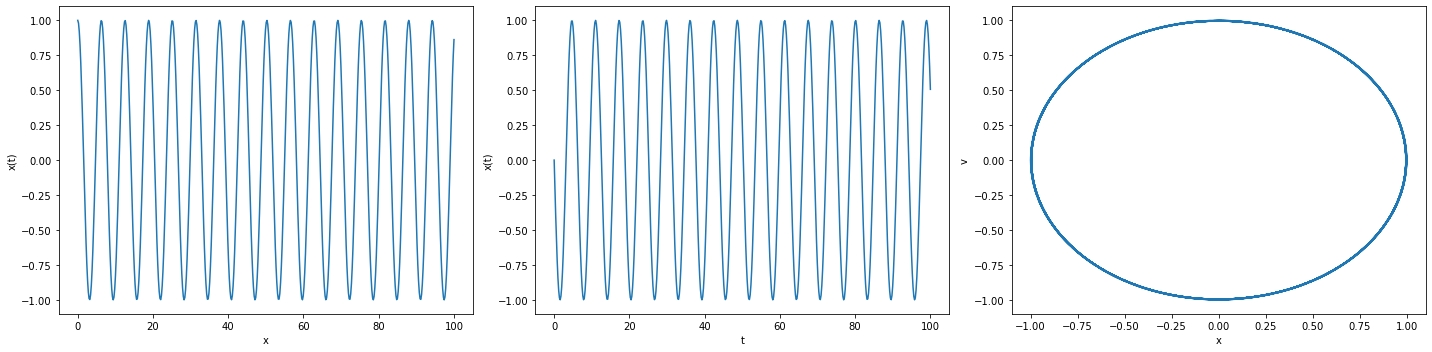

In [51]:
plt.figure(figsize =  (20, 5 ));

ax1 = plt.subplot( 1 , 3 , 1);
#Add a subplot to the current figure.
plt.plot(t ,sol[: , 1]);
# we wrote sol[: , 1] here because of intial condition
plt.xlabel('x');
plt.ylabel('x(t)');

ax2= plt.subplot(1 , 3 , 2);
plt.plot(t, sol[:, 0]);
plt.xlabel('t');
plt.ylabel('x(t)');

ax3 = plt.subplot(1 , 3 , 3 );
plt.plot(sol[:,1] , sol[: , 0]);
plt.xlabel('x');
plt.ylabel('v');

plt.tight_layout()
#Adjust the padding between and around subplots.



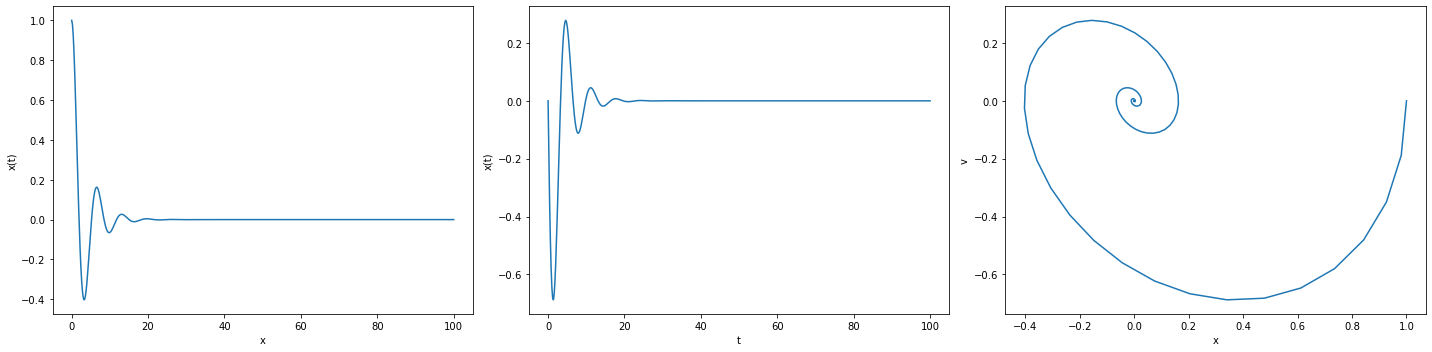

In [47]:
def model( u , t, omega_0 , beta , omega , amplitude):
    #provides derivative of vector  u
    xdot , x = u
    return [- ( omega_0**2)* x - beta * xdot + amplitude *(omega_0**2) * np.sin(omega * t), xdot ]
N = 500
t= np.linspace( 0 , 100 , N)
y0 = [0 , 1] #initial conditions are stable :  velocity and displacement  =  0

beta = 0.555
omega = 0.5 
amplitude = 0;

sol = odeint(model , y0 , t , args=(1,beta,omega,amplitude))
#arguments are defiend above 

plt.figure(figsize =  (20, 5 ));

ax1 = plt.subplot( 1 , 3 , 1);
#Add a subplot to the current figure.
plt.plot(t ,sol[: , 1]);
# we wrote sol[: , 1] here because of intial condition
plt.xlabel('x');
plt.ylabel('x(t)');

ax2= plt.subplot(1 , 3 , 2);
plt.plot(t, sol[:, 0]);
plt.xlabel('t');
plt.ylabel('x(t)');

ax3 = plt.subplot(1 , 3 , 3 );
plt.plot(sol[:,1] , sol[: , 0]);
plt.xlabel('x');
plt.ylabel('v');

plt.tight_layout()
#Adjust the padding between and around subplots.



Above we can see the friction effect of the system 

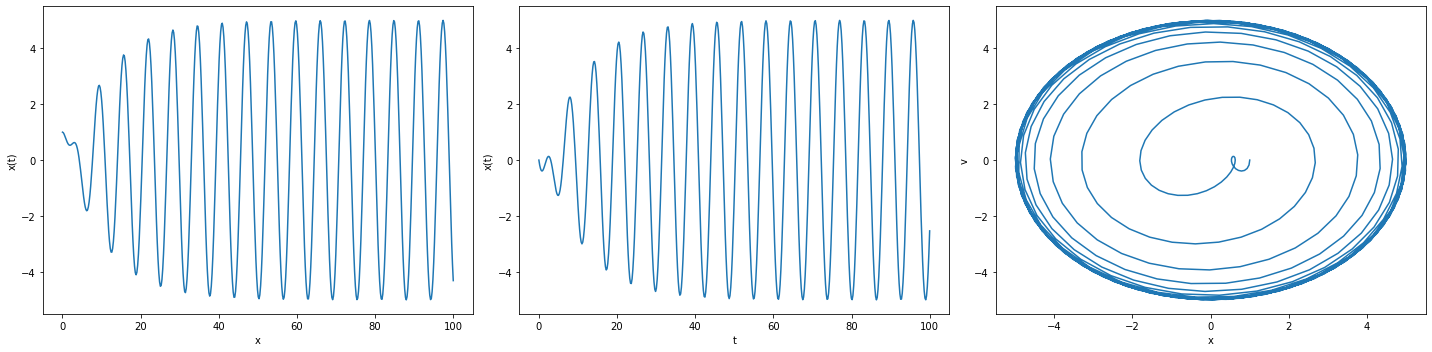

In [54]:
def model( u , t, omega_0 , beta , omega , amplitude):
    #provides derivative of vector  u
    xdot , x = u
    return [- ( omega_0**2)* x - beta * xdot + amplitude *(omega_0**2) * np.sin(omega * t), xdot ]
N = 500
t= np.linspace( 0 , 100 , N)
y0 = [0 , 1] #initial conditions are stable :  velocity and displacement  =  0

beta = 0.2
omega = 1
amplitude = 1 ;

sol = odeint(model , y0 , t , args=(1,beta,omega,amplitude))
#arguments are defiend above 

plt.figure(figsize =  (20, 5 ));

ax1 = plt.subplot( 1 , 3 , 1);
#Add a subplot to the current figure.
plt.plot(t ,sol[: , 1]);
# we wrote sol[: , 1] here because of intial condition
plt.xlabel('x');
plt.ylabel('x(t)');

ax2= plt.subplot(1 , 3 , 2);
plt.plot(t, sol[:, 0]);
plt.xlabel('t');
plt.ylabel('x(t)');

ax3 = plt.subplot(1 , 3 , 3 );
plt.plot(sol[:,1] , sol[: , 0]);
plt.xlabel('x');
plt.ylabel('v');

plt.tight_layout()
#Adjust the padding between and around subplots.

Above system we can the effect of resonance since omega is equal to 1